In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [77]:
df = pd.read_excel("Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [78]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [79]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [80]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [81]:
df = df.set_index('Month')

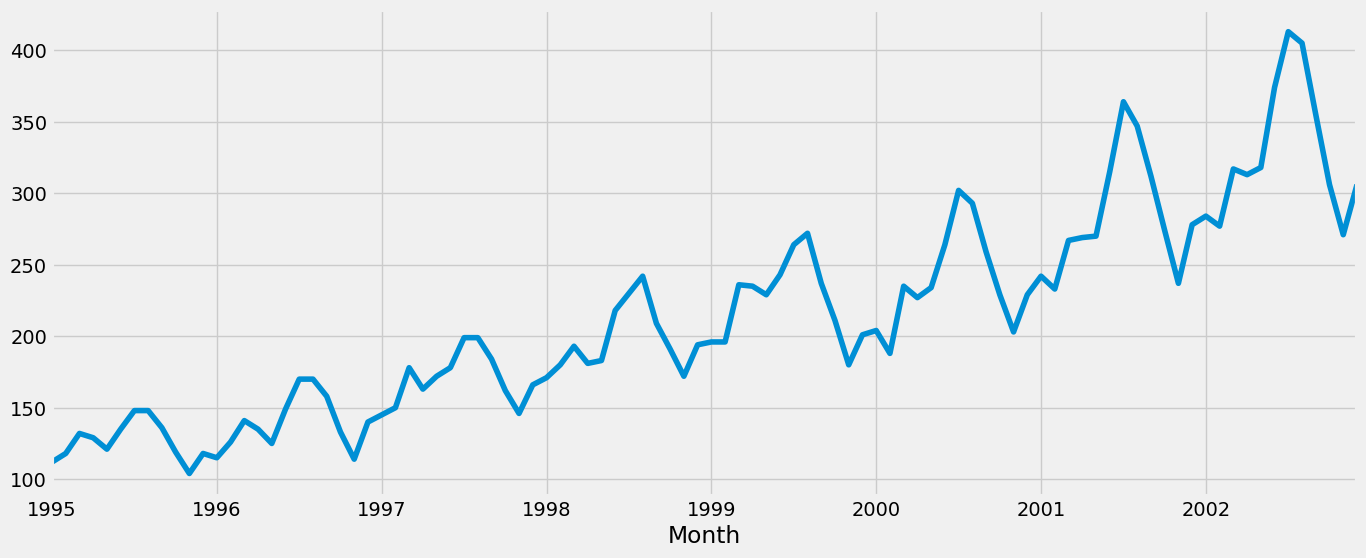

In [82]:
df['Passengers'].plot(figsize=(15, 6))
plt.show()

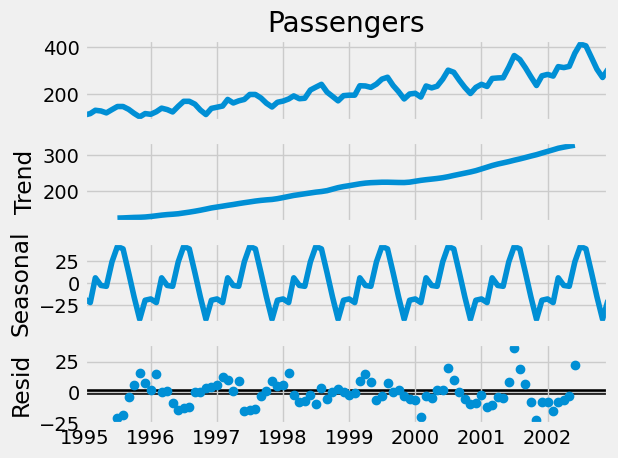

In [83]:
ts_add = seasonal_decompose(df['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

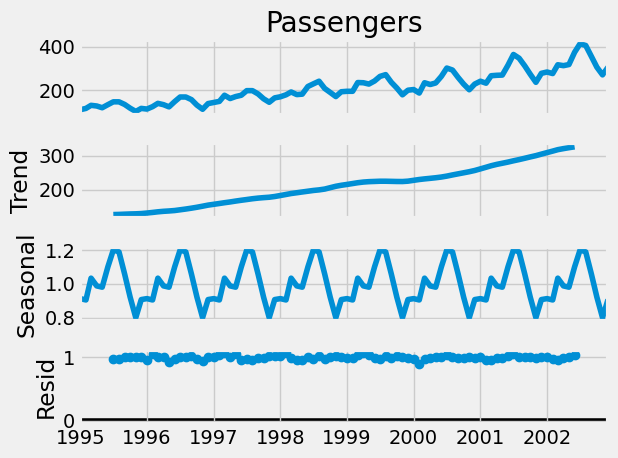

In [84]:
ts_mul = seasonal_decompose(df.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

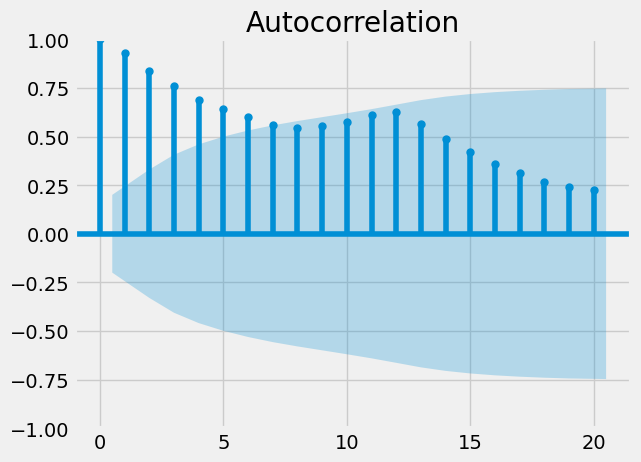

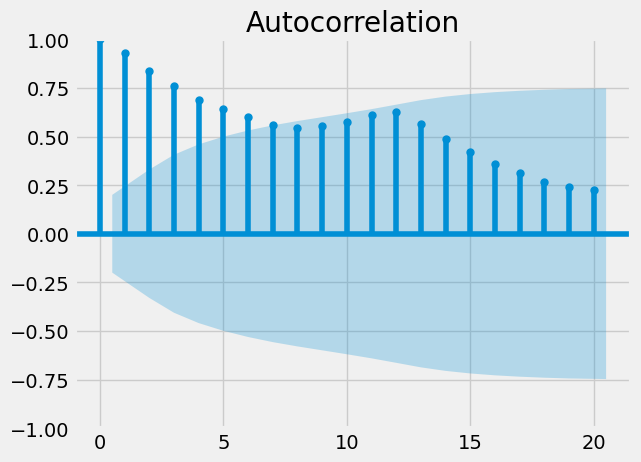

In [85]:
tsa_plots.plot_acf(df['Passengers'])

### Building Time Series forecasting

In [86]:
X = df['Passengers'].values
size = int(len(X) * 0.66)

In [87]:
train, test = X[0:size], X[size:len(X)]

In [88]:
model = ARIMA(train, order=(5,1,0))

In [89]:
model_fit = model.fit()

In [90]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -263.583
Date:                Thu, 29 Feb 2024   AIC                            539.167
Time:                        10:01:09   BIC                            551.929
Sample:                             0   HQIC                           544.178
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1062      0.160      0.663      0.507      -0.208       0.420
ar.L2         -0.1976      0.170     -1.159      0.246      -0.532       0.136
ar.L3         -0.0706      0.126     -0.562      0.5

This summarizes the coefficient values used.

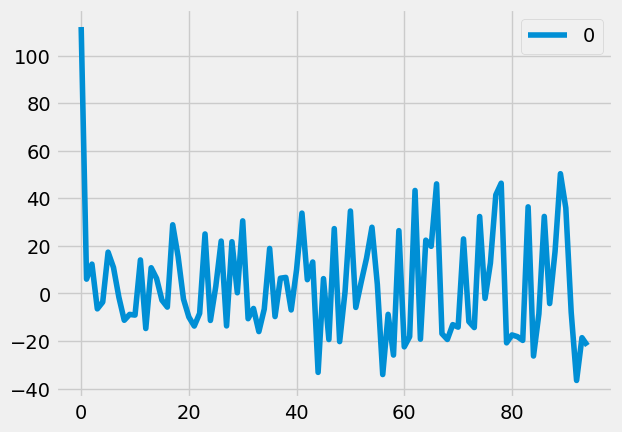

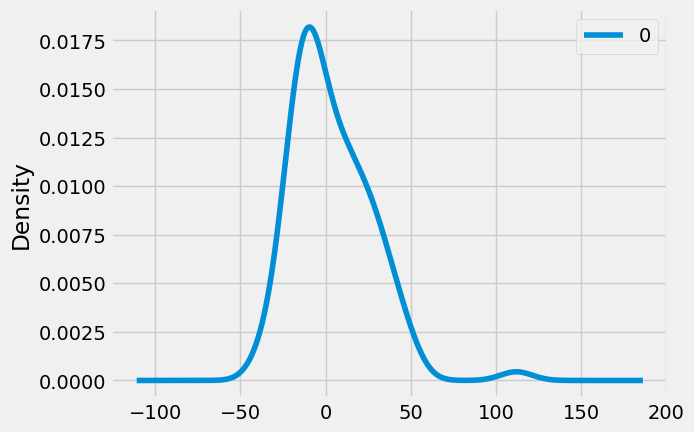

                0
count   95.000000
mean     3.753614
std     23.321195
min    -36.616699
25%    -13.405687
50%     -2.121901
75%     18.213177
max    112.000000


In [232]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Rolling Forecast ARIMA

In [92]:
history = [x for x in train]
predictions = list()

In [93]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=237.351697, expected=227.000000
predicted=218.673588, expected=234.000000
predicted=235.603571, expected=264.000000
predicted=250.751821, expected=302.000000
predicted=306.236426, expected=293.000000
predicted=283.001988, expected=259.000000
predicted=247.529991, expected=229.000000
predicted=224.116737, expected=203.000000
predicted=207.700690, expected=229.000000
predicted=249.298532, expected=242.000000
predicted=248.869263, expected=233.000000
predicted=231.312583, expected=267.000000
predicted=266.498530, expected=269.000000
predicted=259.866113, expected=270.000000
predicted=269.604000, expected=315.000000
predicted=312.657188, expected=364.000000
predicted=368.277208, expected=347.000000
predicted=332.664432, expected=312.000000
predicted=298.257405, expected=274.000000
predicted=262.776570, expected=237.000000
predicted=240.179592, expected=278.000000
predicted=308.214176, expected=284.000000
predicted=287.379158, expected=277.000000
predicted=281.188134, expected=317

In [94]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 792.015


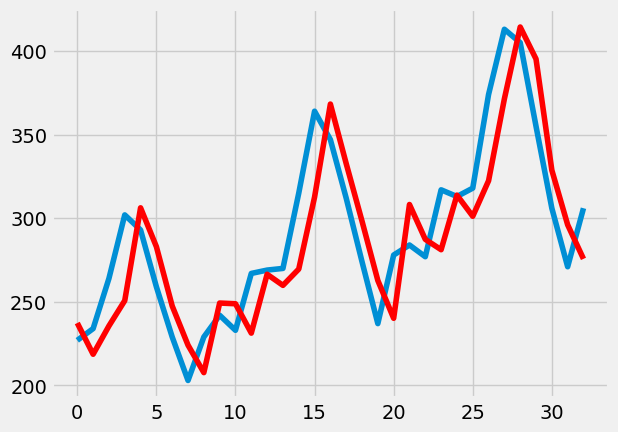

In [96]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

The values are in some trend and are in the right scale.

### Comparing Multiple Models types

In [170]:
df2 = pd.read_excel("Airlines+Data.xlsx")

In [171]:
df2['Month'] = pd.to_datetime(df2['Month'])

# Extract month from the datetime column
df2['Month'] = df2['Month'].dt.month

# Create dummy variables for the month column
dummy = pd.get_dummies(df2['Month'])

# Concatenate the dummy variables with the original dataframe
df2 = pd.concat([df2, dummy], axis=1)

# Drop the original "Month" column.
df2.drop('Month', axis=1, inplace=True)

df2

,Passengers,1,2,3,4,5,6,7,8,9,10,11,12
0,112,1,0,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,1,0,0,0,0
92,355,0,0,0,0,0,0,0,0,1,0,0,0
93,306,0,0,0,0,0,0,0,0,0,1,0,0
94,271,0,0,0,0,0,0,0,0,0,0,1,0


In [172]:
df2.rename(columns = {1: 'month1', 2: 'month2', 3: 'month3', 4: 'month4', 5: 'month5', 6: 'month6', 7: 'month7', 8: 'month8', 9: 'month9', 10: 'month10', 11: 'month11', 12: 'month12'}, inplace=True)
df2.head()

,Passengers,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,112,1,0,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,0,0,0


In [173]:
df2.shape

(96, 13)

In [174]:
t = np.arange(1,97)

In [175]:
df2['t'] = t

In [176]:
df2['t_sq'] = df2['t']*df2['t']

In [177]:
log_Passengers=np.log(df2['Passengers'])

In [178]:
df2['log_Passengers']=log_Passengers

In [179]:
df2.head()

,Passengers,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [180]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [181]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [182]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.189555144151804

In [183]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

In [185]:
additive= smf.ols('Passengers~ month1+month2+month3+month4+month5+month6+month7+month8+month9+month10+month11+month12',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

123.94935401651412

In [189]:
addlinear= smf.ols('Passengers~ t+month1+month2+month3+month4+month5+month6+month7+month8+month9+month10+month11+month12',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.260293870764

In [187]:
addquad=smf.ols('Passengers~t+t_sq+month1+month2+month3+month4+month5+month6+month7+month8+month9+month10+month11+month12',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

34.50350403858292

In [188]:
mulsea=smf.ols('log_Passengers~month1+month2+month3+month4+month5+month6+month7+month8+month9+month10+month11+month12',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

127.83693479585911

In [190]:
mullin= smf.ols('log_Passengers~t+month1+month2+month3+month4+month5+month6+month7+month8+month9+month10+month11+month12',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

12.759135120295506

In [191]:
mul_quad= smf.ols('log_Passengers~t+t_sq+month1+month2+month3+month4+month5+month6+month7+month8+month9+month10+month11+month12',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

28.259578790699152

## Conclusion

In [192]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [193]:
rmse=pd.DataFrame(output)

In [198]:
rmse['Values'] = rmse['Values'].apply(lambda x: '{:.4f}'.format(x))

In [199]:
rmse

,Model,Values
0,rmse_mul_quad,28.2600
1,rmseadd,123.9500
2,rmseaddlinear,34.2600
3,rmseaddquad,34.5000
4,rmseexpo,1603094593327949833782477012254928475874855440...
5,rmselin,25.5000
6,rmsemul,127.8400
7,rmsemulin,12.7600
8,rmsequad,53.1900


Multiplicative seasonality with linear trend has the best RMSE.

### Predict with new data

In [207]:
t = np.arange(95,106)
t

array([ 95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105])

In [208]:
t_squared=np.array(t*t)
t_squared

array([ 9025,  9216,  9409,  9604,  9801, 10000, 10201, 10404, 10609,
       10816, 11025])

In [225]:
month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [226]:
df_new={'t':t,'t_squared':t_squared}
df_new=pd.DataFrame(df_new)

In [227]:
newdata = pd.concat([month,df_new],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,95,9025
1,2003-02-01,96,9216
2,2003-03-01,97,9409
3,2003-04-01,98,9604
4,2003-05-01,99,9801
5,2003-06-01,100,10000
6,2003-07-01,101,10201
7,2003-08-01,102,10404
8,2003-09-01,103,10609
9,2003-10-01,104,10816


### Building model on entire dataset

In [228]:
model_full = smf.ols('Passengers~t',data=df2).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     322.272461
1     324.607174
2     326.941886
3     329.276598
4     331.611311
5     333.946023
6     336.280736
7     338.615448
8     340.950161
9     343.284873
10    345.619585
dtype: float64

In [229]:
newdata["forecasted_passengers"]=pd.Series(pred_new)

In [230]:
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,95,9025,322.272461
1,2003-02-01,96,9216,324.607174
2,2003-03-01,97,9409,326.941886
3,2003-04-01,98,9604,329.276598
4,2003-05-01,99,9801,331.611311
5,2003-06-01,100,10000,333.946023
6,2003-07-01,101,10201,336.280736
7,2003-08-01,102,10404,338.615448
8,2003-09-01,103,10609,340.950161
9,2003-10-01,104,10816,343.284873
